In [1]:
import pandas as pd
import numpy as np
from sklearn import 
from sklearn.neighbors import KNeighborsClassifier
 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(url, header = None)
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [2]:
df.shape

(178, 14)

In [3]:
X = df.iloc[:,1:14]
y = df.iloc[:,0]

In [4]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [26]:
def test_accuracy(kf, X, y):
    scores = list()
    for k in range(1,51):
        model = KNeighborsClassifier(n_neighbors=k)
        scores.append(cross_val_score(model, X, y, cv=kf, scoring='accuracy'))
    return scores

In [28]:
accuracy = test_accuracy(kf, X, y)
print(len(accuracy))

50


In [14]:
print(accuracy)

[array([0.77777778, 0.66666667, 0.72222222, 0.71428571, 0.77142857])]


In [29]:
print(accuracy[0])

[0.77777778 0.66666667 0.72222222 0.71428571 0.77142857]


In [34]:
print(np.average(accuracy, axis=1))

[0.73047619 0.66253968 0.70825397 0.65777778 0.67460317 0.67428571
 0.68       0.68       0.70238095 0.68015873 0.70253968 0.69666667
 0.69095238 0.67936508 0.70190476 0.67952381 0.7015873  0.67952381
 0.67936508 0.69095238 0.70190476 0.69650794 0.70206349 0.70761905
 0.70190476 0.69650794 0.69634921 0.70793651 0.71349206 0.70793651
 0.69095238 0.71349206 0.71349206 0.72460317 0.72460317 0.71349206
 0.71349206 0.71349206 0.70793651 0.70777778 0.71349206 0.70777778
 0.70777778 0.70777778 0.70777778 0.70777778 0.69666667 0.71904762
 0.69666667 0.70777778]


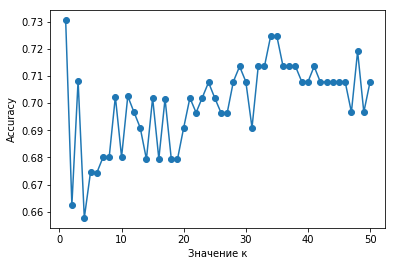

In [33]:
import matplotlib.pyplot as plt
plt.plot(range(1,51),np.average(accuracy, axis=1), marker='o')
plt.xlabel('Значение к')
plt.ylabel('Accuracy')
plt.show()

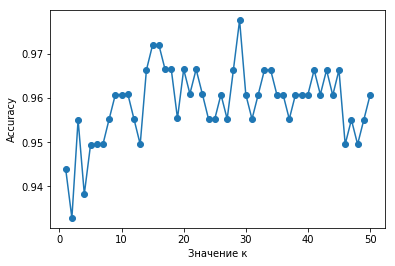

In [36]:
import sklearn
X = sklearn.preprocessing.scale(X)
accuracy = test_accuracy(kf, X, y)
plt.plot(range(1,51),np.average(accuracy, axis=1), marker='o')
plt.xlabel('Значение к')
plt.ylabel('Accuracy')
plt.show()

In [37]:
print(np.average(accuracy, axis=1))

[0.94396825 0.93285714 0.95507937 0.93825397 0.94936508 0.94952381
 0.94952381 0.9552381  0.96079365 0.96079365 0.96095238 0.9552381
 0.94952381 0.96634921 0.97206349 0.97206349 0.96650794 0.96650794
 0.95539683 0.96650794 0.96095238 0.96650794 0.96095238 0.9552381
 0.9552381  0.96079365 0.9552381  0.96634921 0.97761905 0.96079365
 0.9552381  0.96079365 0.96634921 0.96634921 0.96079365 0.96079365
 0.9552381  0.96079365 0.96079365 0.96079365 0.96634921 0.96079365
 0.96634921 0.96063492 0.96634921 0.94952381 0.95507937 0.94952381
 0.95507937 0.96063492]
